In [71]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

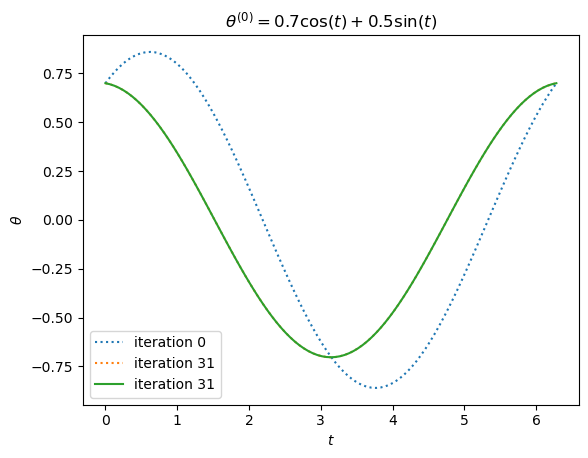

In [66]:
# pendulum
x0 = 0.7
xN = x0
t0 = 0
tN = 2* np.pi
N = 101
t = np.linspace(t0, tN, N)
h = t[1] - t[0]


def F(x):
    y = np.zeros((N-2,1))
    for i in range(N-2):
        y[i] = x[i] - 2*x[i+1] + x[i+2] + h**2*np.sin(x[i+1])
    return y

def J(x):
    y = np.zeros((N-2,N-2))

    for i in range(N-2):
        y[i, i] = -2 + h**2*np.cos(x[i+1])
        if(i>1):
            y[i, i-1] = 1
        if(i<N-3):
            y[i, i+1] = 1

    return y

max_steps = 500
x = 0.7 * np.cos(t) + 0.5 * np.sin(t)
k = 0
plt.figure()
X = [x]
while np.max(np.abs(F(x))) >= 1e-8 and k < max_steps:
    dx = np.linalg.solve(J(x), F(x))
    new_x = np.zeros_like(x)
    new_x[0] = x0
    new_x[-1] = xN
    new_x[1:-1] = x[1:-1] - dx[:,0]
    x = new_x
    k += 1
    X.append(new_x)
plt.plot(t,X[0],':',label=f'iteration {0}')
plt.plot(t,X[-1],':',label=f'iteration {len(X)-1}')
plt.plot(t,x,'-',label=f'iteration {len(X)-1}')

plt.legend()
plt.title(r'$\theta^{(0)} = 0.7\cos(t) + 0.5 \sin(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()


In [63]:
noise = np.random.normal(0,0.1,101)
noise

array([-1.14349900e-04,  7.30713334e-02,  1.28619625e-01, -2.59252178e-02,
        6.70909672e-02, -8.75539303e-02,  1.36150003e-01,  4.02728445e-02,
        2.23979273e-03, -3.51910417e-01,  9.69377976e-02,  1.31331434e-01,
       -9.35171494e-02,  1.00129308e-01, -2.86457750e-02,  9.15033837e-02,
        5.76728828e-02,  4.89749207e-02,  6.71651025e-02, -7.00035064e-02,
       -1.95812439e-01, -8.43068471e-02,  4.53821731e-02,  8.80630385e-03,
       -1.32857381e-01, -1.57338000e-03, -1.54174671e-01,  4.94719774e-02,
        2.91668113e-02, -2.43460969e-02, -6.41966927e-02,  1.82534675e-01,
        8.20635311e-02,  1.69387227e-02, -9.44696022e-03, -5.16501660e-02,
        1.25045597e-02, -1.35168824e-01, -2.56376600e-02,  1.42968344e-03,
        9.96376277e-02,  5.70063607e-02, -3.00183886e-02, -9.82846995e-02,
        6.63049669e-02, -4.21746270e-02, -5.55022059e-02, -1.50686240e-01,
        9.55902705e-02,  2.43010999e-02, -8.84720238e-02, -8.00845578e-02,
        3.69685993e-02,  

In [79]:
signal = x + noise
signal[0] = x[0]
signal[-1] = x[-1]
# t
df = pd.DataFrame(np.array([t,signal]).T,columns=['t','theta'])
df.to_csv('pendulum_data.csv', index=False)

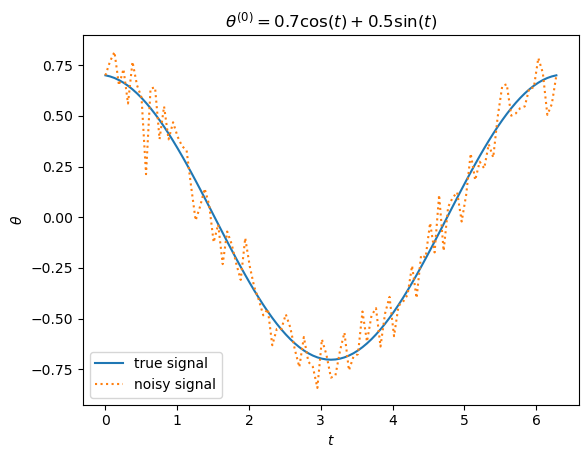

In [80]:
plt.figure()
plt.plot(t,x,'-',label=f'true signal')
plt.plot(t,signal,':',label=f'noisy signal')

plt.legend()
plt.title(r'$\theta^{(0)} = 0.7\cos(t) + 0.5 \sin(t)$')
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta$')
plt.show()

In [81]:
# smoothing
T = t.reshape(-1,1)
UXX = rbf_kernel(T, T)
# UXX = polynomial_kernel(T,T, degree=4)

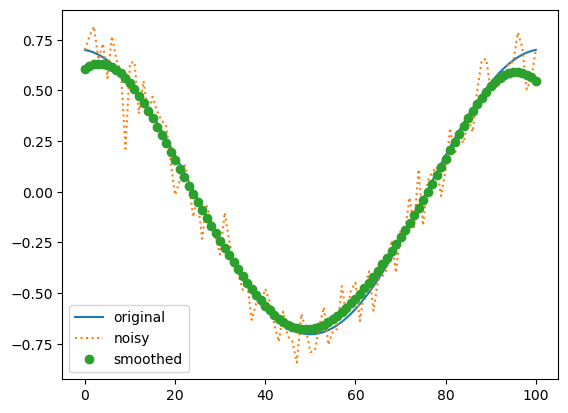

In [82]:
lam = 1
data = df.to_numpy()
u = signal
UXX_inv_u = np.linalg.solve(UXX + lam**2*np.eye(101), u)
smoothed = UXX @ UXX_inv_u

plt.figure()
plt.plot(x, '-', label='original')
plt.plot(signal, ':', label='noisy')
plt.plot(smoothed, 'o', label='smoothed')
plt.legend()
plt.show()

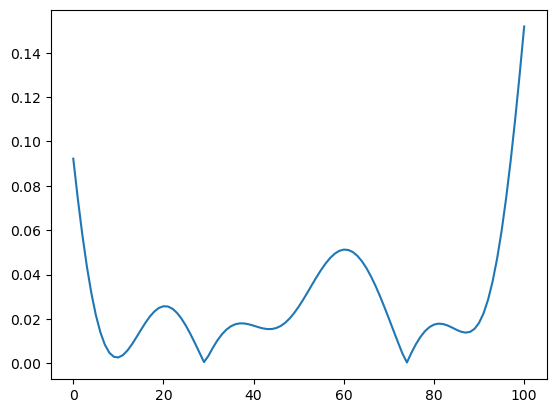

In [83]:
error = np.abs(smoothed - x)
plt.plot(error)